# Análisis Exploratorio - UCI Individual Household Electric Power Consumption

**TFG:** Detección de Anomalías de Consumo Eléctrico en Edge Computing para la Mitigación de Ataques FDI

**Autor:** Matvey Sinelnik

**Objetivo de este notebook:**
1. Cargar y limpiar el dataset UCI Household (train + test)
2. Análisis exploratorio completo (distribuciones, patrones temporales, correlaciones)
3. Identificar el comportamiento "normal" de consumo — base para la posterior inyección de ataques FDI
4. Documentar hallazgos para el Capítulo 4 del TFG

## 0. Setup e Instalación

In [25]:
# Instalar dependencias si es necesario
!pip install pandas numpy matplotlib seaborn scikit-learn

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 5)
plt.rcParams['font.size'] = 12

print("Librerías cargadas correctamente")

Librerías cargadas correctamente


## 1. Carga de Datos

Ajusta las rutas según la estructura de tu repositorio. Se asume que tienes:
```
data/
  ├── train.csv
  └── test.csv
```

In [27]:
# ============================================================
# AJUSTAR ESTAS RUTAS según tu estructura de carpetas
# ============================================================
TRAIN_PATH = '/Volumes/Extreme Pro Particion 1TB/TFG/UCIrvine/household_power_consumption_train.csv'
TEST_PATH = '/Volumes/Extreme Pro Particion 1TB/TFG/UCIrvine/household_power_consumption_test.csv'

# Cargar train y test
df_train = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)

print(f"Train: {df_train.shape[0]:,} filas, {df_train.shape[1]} columnas")
print(f"Test:  {df_test.shape[0]:,} filas, {df_test.shape[1]} columnas")
print(f"Total: {df_train.shape[0] + df_test.shape[0]:,} filas")
print(f"\nColumnas: {list(df_train.columns)}")

Train: 1,452,681 filas, 9 columnas
Test:  622,578 filas, 9 columnas
Total: 2,075,259 filas

Columnas: ['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']


In [28]:
# Vista previa de los datos
print("=" * 60)
print("TRAIN - Primeras filas")
print("=" * 60)
display(df_train.head(10))

print("\n" + "=" * 60)
print("TEST - Primeras filas")
print("=" * 60)
display(df_test.head(10))

TRAIN - Primeras filas


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0



TEST - Primeras filas


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,20/9/2009,12:45:00,1.758,0.396,242.030,7.600,0.000,0.000,19.0
1,20/9/2009,12:46:00,3.988,0.404,239.530,16.600,38.000,0.000,18.0
2,20/9/2009,12:47:00,3.880,0.318,239.020,16.200,39.000,0.000,18.0
3,20/9/2009,12:48:00,3.876,0.316,239.150,16.200,39.000,0.000,18.0
4,20/9/2009,12:49:00,3.894,0.318,239.650,16.200,39.000,0.000,19.0
5,20/9/2009,12:50:00,3.886,0.314,239.370,16.200,38.000,0.000,18.0
6,20/9/2009,12:51:00,3.896,0.314,239.390,16.200,39.000,0.000,18.0
7,20/9/2009,12:52:00,4.206,0.402,238.750,17.800,39.000,0.000,18.0
8,20/9/2009,12:53:00,3.880,0.312,239.100,16.200,39.000,0.000,18.0
9,20/9/2009,12:54:00,3.866,0.310,238.680,16.200,38.000,0.000,18.0


In [29]:
# Info de tipos de datos
print("Tipos de datos (train):")
print(df_train.dtypes)
print(f"\nMemoria train: {df_train.memory_usage(deep=True).sum() / 1e6:.1f} MB")
print(f"Memoria test:  {df_test.memory_usage(deep=True).sum() / 1e6:.1f} MB")

Tipos de datos (train):
Date                         str
Time                         str
Global_active_power          str
Global_reactive_power        str
Voltage                      str
Global_intensity             str
Sub_metering_1               str
Sub_metering_2               str
Sub_metering_3           float64
dtype: object

Memoria train: 175.7 MB
Memoria test:  252.1 MB


## 2. Limpieza y Preprocesamiento

El dataset original usa `?` para valores perdidos. Dependiendo de cómo hayas hecho el split, 
estos pueden estar ya gestionados o no. Vamos a verificar y limpiar.

In [30]:
def limpiar_dataset(df, nombre='dataset'):
    """
    Limpieza completa del dataset UCI Household.
    - Reemplaza '?' por NaN
    - Crea columna datetime
    - Convierte columnas numéricas
    - Calcula Sub_metering_rest (consumo no sub-medido)
    """
    df = df.copy()
    
    # 1. Reemplazar '?' por NaN
    df.replace('?', np.nan, inplace=True)
    
    # 2. Crear columna datetime
    #    Intentamos varios formatos posibles según cómo estén los CSVs
    if 'Date' in df.columns and 'Time' in df.columns:
        # Formato original: dd/mm/yyyy + hh:mm:ss
        df['datetime'] = pd.to_datetime(
            df['Date'] + ' ' + df['Time'],
            format='%d/%m/%Y %H:%M:%S',
            errors='coerce'
        )
    elif 'datetime' in df.columns or 'Datetime' in df.columns:
        col = 'datetime' if 'datetime' in df.columns else 'Datetime'
        df['datetime'] = pd.to_datetime(df[col], errors='coerce')
    else:
        # Si las columnas tienen otro nombre, intenta combinar las dos primeras
        print(f"  [AVISO] Columnas detectadas: {list(df.columns)}")
        print(f"  Intentando usar las dos primeras columnas como Date + Time...")
        df['datetime'] = pd.to_datetime(
            df.iloc[:, 0].astype(str) + ' ' + df.iloc[:, 1].astype(str),
            errors='coerce'
        )
    
    # 3. Definir columnas numéricas
    numeric_cols = [
        'Global_active_power', 'Global_reactive_power',
        'Voltage', 'Global_intensity',
        'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
    ]
    
    # Buscar columnas que existan (por si el CSV tiene nombres ligeramente distintos)
    existing_numeric = [c for c in numeric_cols if c in df.columns]
    
    for col in existing_numeric:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # 4. Calcular Sub_metering_rest (consumo no sub-medido)
    if all(c in df.columns for c in ['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']):
        df['Sub_metering_rest'] = (
            df['Global_active_power'] * 1000 / 60
            - df['Sub_metering_1']
            - df['Sub_metering_2']
            - df['Sub_metering_3']
        )
    
    # 5. Establecer datetime como índice
    if df['datetime'].notna().sum() > 0:
        df = df.set_index('datetime')
        df = df.sort_index()
    
    # 6. Eliminar columnas Date/Time originales si existen
    for col in ['Date', 'Time']:
        if col in df.columns:
            df.drop(col, axis=1, inplace=True)
    
    # 7. Resumen
    n_missing = df.isna().sum().sum()
    pct_missing = (n_missing / (df.shape[0] * df.shape[1])) * 100
    print(f"\n[{nombre}] Limpieza completada:")
    print(f"  Filas: {df.shape[0]:,}")
    print(f"  Rango temporal: {df.index.min()} → {df.index.max()}")
    print(f"  Valores perdidos: {n_missing:,} ({pct_missing:.2f}%)")
    
    return df


# Aplicar limpieza
df_train = limpiar_dataset(df_train, 'TRAIN')
df_test = limpiar_dataset(df_test, 'TEST')


[TRAIN] Limpieza completada:
  Filas: 1,452,681
  Rango temporal: 2006-12-16 17:24:00 → 2009-09-20 12:44:00
  Valores perdidos: 66,752 (0.57%)

[TEST] Limpieza completada:
  Filas: 622,578
  Rango temporal: 2009-09-20 12:45:00 → 2010-11-26 21:02:00
  Valores perdidos: 141,080 (2.83%)


In [31]:
# Combinar para análisis exploratorio global
# (mantenemos la separación train/test para cuando entrenemos modelos)
df_full = pd.concat([df_train, df_test]).sort_index()
df_full = df_full[~df_full.index.duplicated(keep='first')]  # eliminar duplicados si los hay

print(f"Dataset completo: {df_full.shape[0]:,} filas")
print(f"Rango: {df_full.index.min()} → {df_full.index.max()}")
print(f"Duración: {(df_full.index.max() - df_full.index.min()).days} días")

Dataset completo: 2,075,259 filas
Rango: 2006-12-16 17:24:00 → 2010-11-26 21:02:00
Duración: 1441 días


### 2.1 Análisis de Valores Perdidos

Valores perdidos por columna:


,Valores perdidos,Porcentaje (%)
Global_active_power,25979,1.25
Global_reactive_power,25979,1.25
Voltage,25979,1.25
Global_intensity,25979,1.25
Sub_metering_1,25979,1.25
Sub_metering_2,25979,1.25
Sub_metering_3,25979,1.25
Sub_metering_rest,25979,1.25


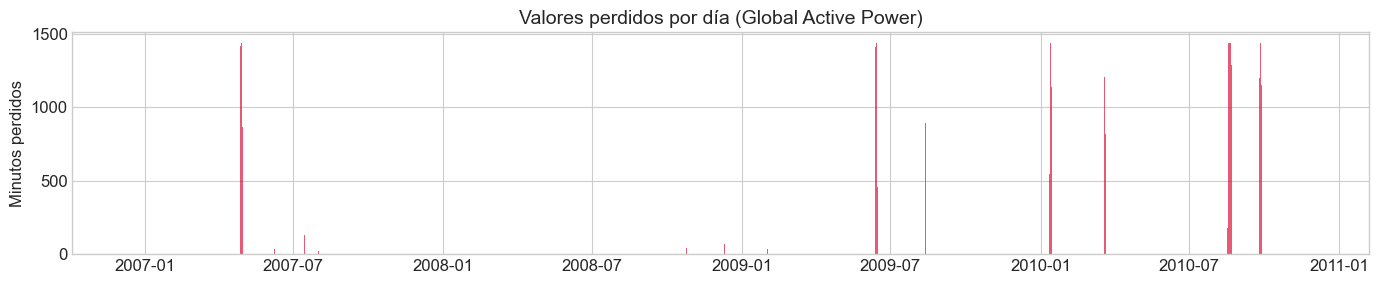


Días con TODOS los minutos perdidos (1440 min): 9
Días con algún valor perdido: 82


In [32]:
# Distribución de valores perdidos por columna
missing = df_full.isna().sum()
missing_pct = (missing / len(df_full)) * 100

missing_df = pd.DataFrame({
    'Valores perdidos': missing,
    'Porcentaje (%)': missing_pct.round(2)
})
missing_df = missing_df[missing_df['Valores perdidos'] > 0]

print("Valores perdidos por columna:")
display(missing_df)

# Visualizar distribución temporal de valores perdidos
fig, ax = plt.subplots(figsize=(14, 3))
missing_by_day = df_full['Global_active_power'].isna().resample('D').sum()
ax.bar(missing_by_day.index, missing_by_day.values, width=1, color='crimson', alpha=0.7)
ax.set_title('Valores perdidos por día (Global Active Power)', fontsize=14)
ax.set_ylabel('Minutos perdidos')
ax.set_xlabel('')
plt.tight_layout()
plt.show()

print(f"\nDías con TODOS los minutos perdidos (1440 min): "
      f"{(missing_by_day == 1440).sum()}")
print(f"Días con algún valor perdido: {(missing_by_day > 0).sum()}")

In [33]:
# Estrategia de imputación para valores perdidos
# Usamos interpolación lineal para gaps pequeños (<= 10 min)
# y dejamos NaN para gaps grandes (los eliminaremos en ventanas)

numeric_cols = df_full.select_dtypes(include=[np.number]).columns.tolist()

df_clean = df_full.copy()
df_clean[numeric_cols] = df_clean[numeric_cols].interpolate(
    method='linear', limit=10  # solo interpola gaps de hasta 10 minutos
)

remaining_missing = df_clean[numeric_cols].isna().sum().sum()
print(f"Valores perdidos antes de interpolación: {df_full[numeric_cols].isna().sum().sum():,}")
print(f"Valores perdidos después de interpolación (limit=10): {remaining_missing:,}")

# Eliminar filas restantes con NaN
df_clean = df_clean.dropna(subset=numeric_cols)
print(f"Filas finales tras eliminar NaN restantes: {df_clean.shape[0]:,}")
print(f"Porcentaje de datos conservados: {df_clean.shape[0]/df_full.shape[0]*100:.1f}%")

Valores perdidos antes de interpolación: 207,832
Valores perdidos después de interpolación (limit=10): 205,976
Filas finales tras eliminar NaN restantes: 2,049,512
Porcentaje de datos conservados: 98.8%


## 3. Estadísticas Descriptivas

In [34]:
# Estadísticas descriptivas completas
stats = df_clean[numeric_cols].describe().T
stats['missing_pct'] = ((df_full[numeric_cols].isna().sum() / len(df_full)) * 100).round(2)
stats['skew'] = df_clean[numeric_cols].skew().round(3)
stats['kurtosis'] = df_clean[numeric_cols].kurtosis().round(3)

print("Estadísticas descriptivas completas:")
display(stats.round(4))

Estadísticas descriptivas completas:


,count,mean,std,min,25%,50%,75%,max,missing_pct,skew,kurtosis
Global_active_power,2049512.0,1.0916,1.0573,0.076,0.308,0.602,1.5280,11.1220,1.25,1.786,4.219
Global_reactive_power,2049512.0,0.1237,0.1127,0.000,0.048,0.100,0.1940,1.3900,1.25,1.262,2.607
Voltage,2049512.0,240.8398,3.2400,223.200,238.990,241.010,242.8900,254.1500,1.25,-0.327,0.725
Global_intensity,2049512.0,4.6278,4.4444,0.200,1.400,2.600,6.4000,48.4000,1.25,1.849,4.601
Sub_metering_1,2049512.0,1.1219,6.1530,0.000,0.000,0.000,0.0000,88.0000,1.25,5.945,35.644
Sub_metering_2,2049512.0,1.2985,5.8219,0.000,0.000,0.000,1.0000,80.0000,1.25,7.091,57.908
Sub_metering_3,2049512.0,6.4584,8.4371,0.000,0.000,1.000,17.0000,31.0000,1.25,0.725,-1.282
Sub_metering_rest,2049512.0,9.3151,9.5862,-2.400,3.800,5.500,10.3667,124.8333,1.25,2.487,7.911


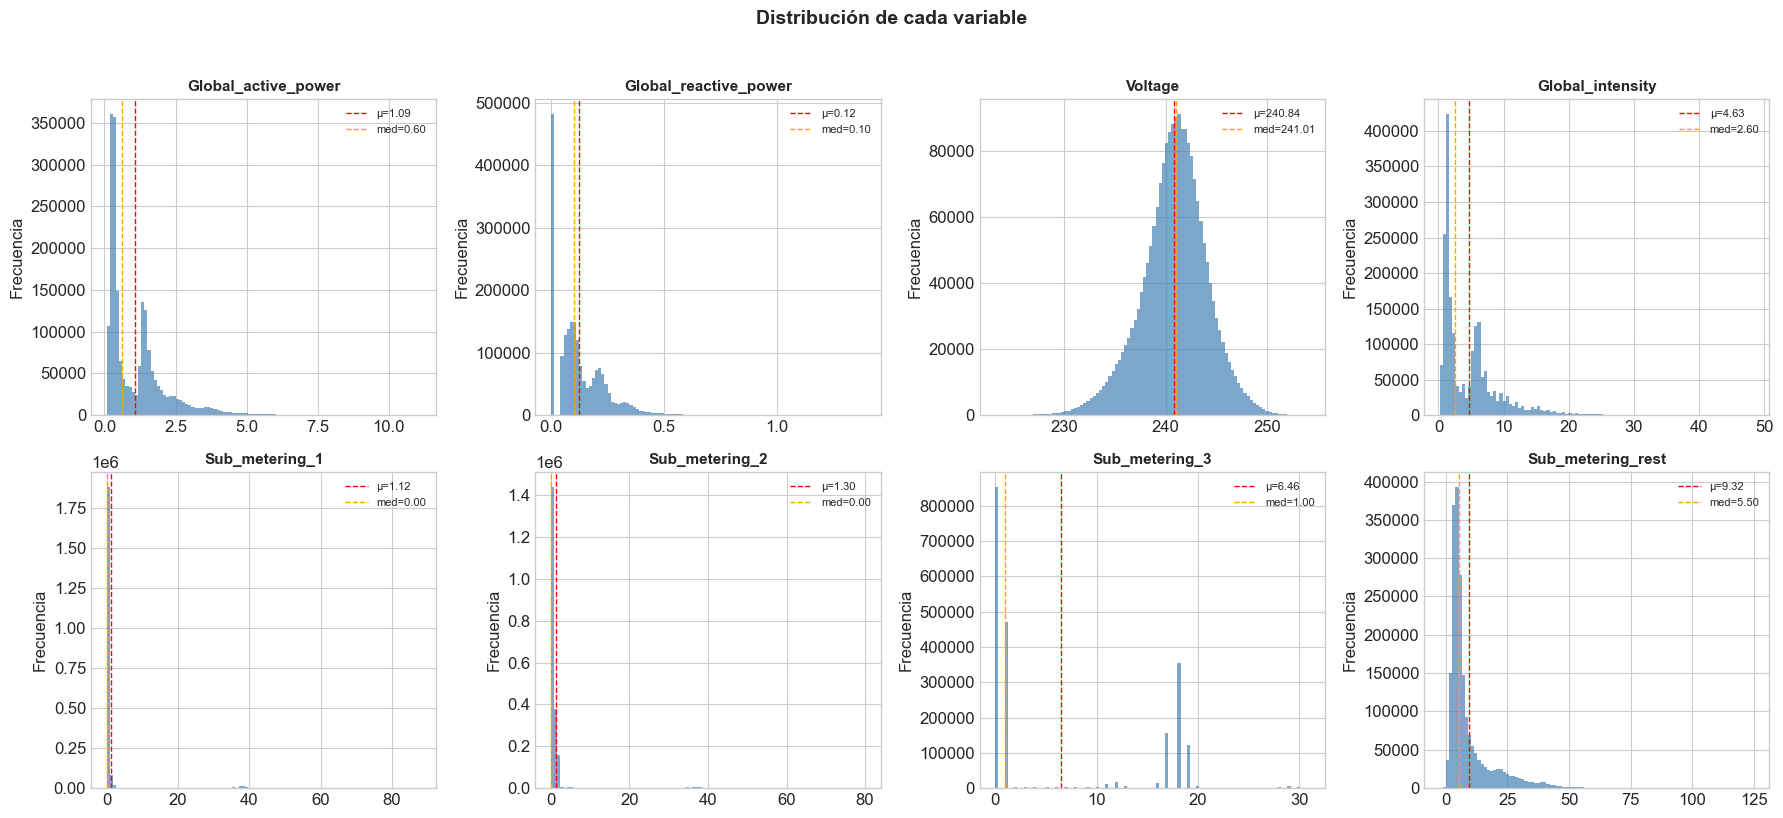

In [35]:
# Distribuciones de cada variable
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()

plot_cols = [c for c in numeric_cols if c != 'Sub_metering_rest'] + ['Sub_metering_rest']
plot_cols = [c for c in plot_cols if c in df_clean.columns][:8]

for i, col in enumerate(plot_cols):
    ax = axes[i]
    data = df_clean[col].dropna()
    
    # Histograma
    ax.hist(data, bins=100, color='steelblue', alpha=0.7, edgecolor='none')
    ax.set_title(col, fontsize=11, fontweight='bold')
    ax.axvline(data.mean(), color='red', linestyle='--', linewidth=1, label=f'μ={data.mean():.2f}')
    ax.axvline(data.median(), color='orange', linestyle='--', linewidth=1, label=f'med={data.median():.2f}')
    ax.legend(fontsize=8)
    ax.set_ylabel('Frecuencia')

# Ocultar ejes sobrantes
for j in range(len(plot_cols), len(axes)):
    axes[j].set_visible(False)

fig.suptitle('Distribución de cada variable', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 4. Patrones Temporales

Entender los patrones normales de consumo es **fundamental** para luego poder detectar anomalías.
Un ataque FDI será detectable si rompe estos patrones.

### 4.1 Patrón Diario (perfil medio por hora del día)

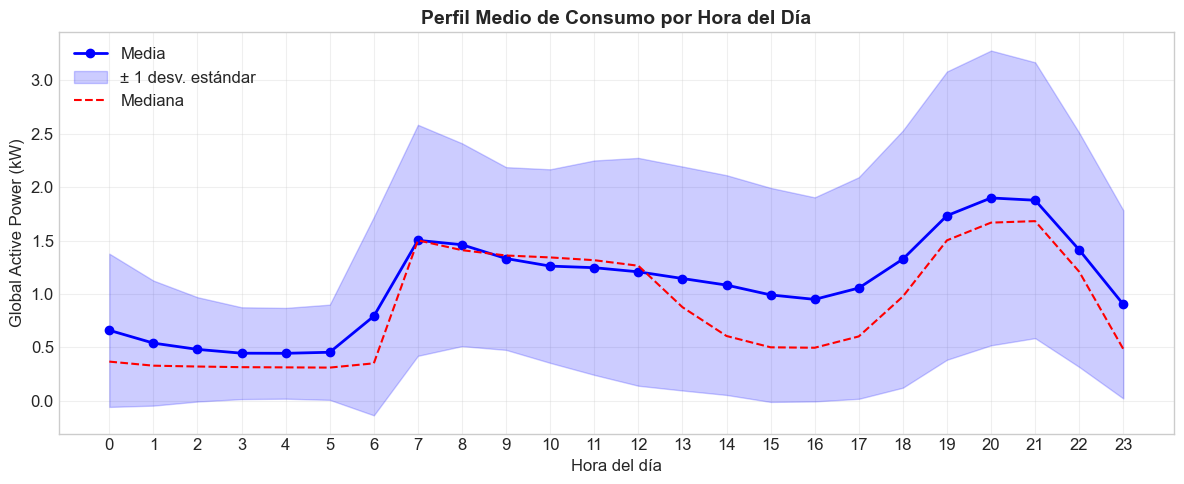


Observaciones:
  Hora de mínimo consumo: 4:00 (0.444 kW)
  Hora de máximo consumo: 20:00 (1.899 kW)
  Ratio máx/mín: 4.3x


In [36]:
# Perfil medio de consumo por hora del día
df_clean['hour'] = df_clean.index.hour
df_clean['dayofweek'] = df_clean.index.dayofweek  # 0=Lunes, 6=Domingo
df_clean['month'] = df_clean.index.month
df_clean['year'] = df_clean.index.year
df_clean['is_weekend'] = df_clean['dayofweek'].isin([5, 6]).astype(int)

hourly_profile = df_clean.groupby('hour')['Global_active_power'].agg(['mean', 'std', 'median'])

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(hourly_profile.index, hourly_profile['mean'], 'b-o', linewidth=2, label='Media')
ax.fill_between(
    hourly_profile.index,
    hourly_profile['mean'] - hourly_profile['std'],
    hourly_profile['mean'] + hourly_profile['std'],
    alpha=0.2, color='blue', label='± 1 desv. estándar'
)
ax.plot(hourly_profile.index, hourly_profile['median'], 'r--', linewidth=1.5, label='Mediana')
ax.set_xlabel('Hora del día')
ax.set_ylabel('Global Active Power (kW)')
ax.set_title('Perfil Medio de Consumo por Hora del Día', fontsize=14, fontweight='bold')
ax.set_xticks(range(24))
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nObservaciones:")
print(f"  Hora de mínimo consumo: {hourly_profile['mean'].idxmin()}:00 ({hourly_profile['mean'].min():.3f} kW)")
print(f"  Hora de máximo consumo: {hourly_profile['mean'].idxmax()}:00 ({hourly_profile['mean'].max():.3f} kW)")
print(f"  Ratio máx/mín: {hourly_profile['mean'].max() / hourly_profile['mean'].min():.1f}x")

### 4.2 Laborable vs Fin de Semana

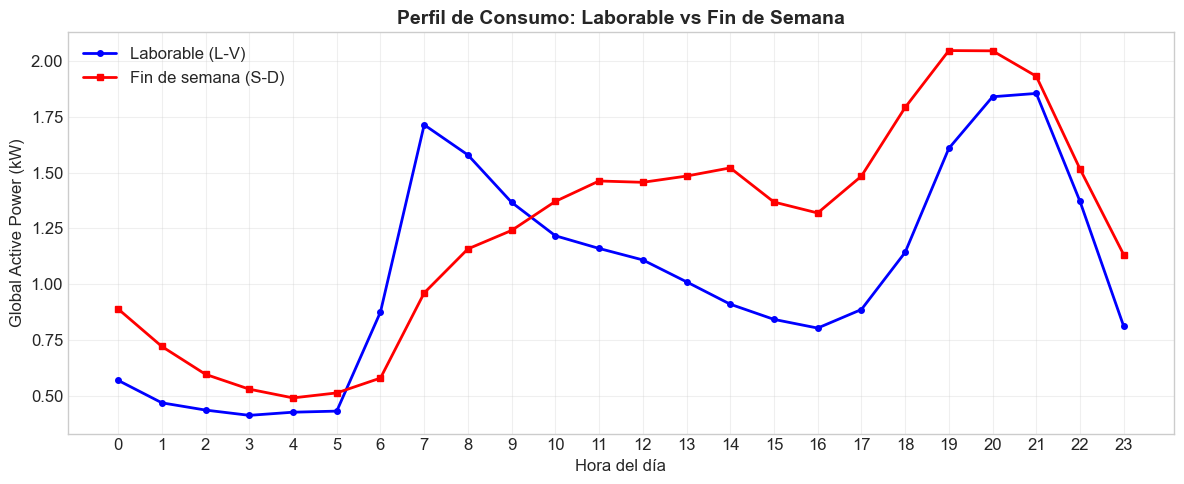

In [37]:
# Comparar perfil laborable vs fin de semana
weekday_profile = df_clean[df_clean['is_weekend'] == 0].groupby('hour')['Global_active_power'].mean()
weekend_profile = df_clean[df_clean['is_weekend'] == 1].groupby('hour')['Global_active_power'].mean()

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(weekday_profile.index, weekday_profile.values, 'b-o', linewidth=2, markersize=4, label='Laborable (L-V)')
ax.plot(weekend_profile.index, weekend_profile.values, 'r-s', linewidth=2, markersize=4, label='Fin de semana (S-D)')
ax.set_xlabel('Hora del día')
ax.set_ylabel('Global Active Power (kW)')
ax.set_title('Perfil de Consumo: Laborable vs Fin de Semana', fontsize=14, fontweight='bold')
ax.set_xticks(range(24))
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 4.3 Patrón Semanal

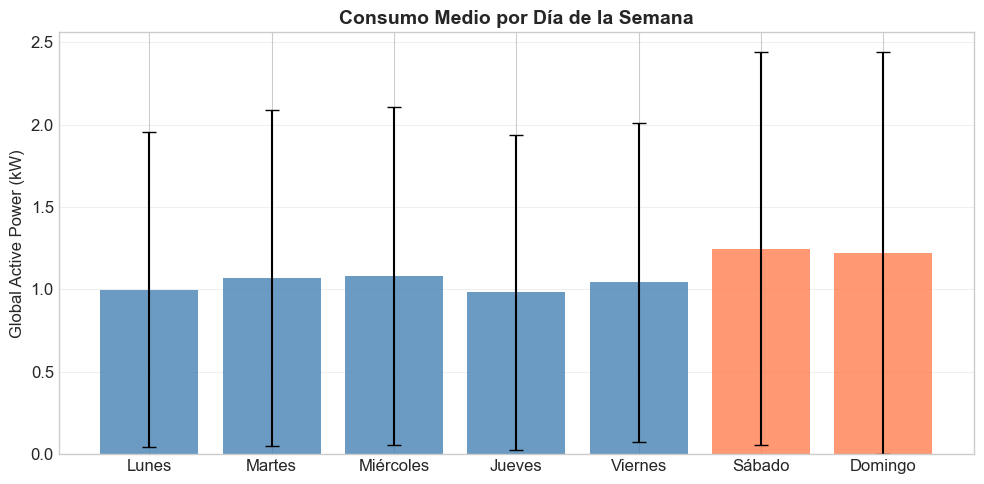

In [38]:
# Consumo medio por día de la semana
days_es = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
weekly_profile = df_clean.groupby('dayofweek')['Global_active_power'].agg(['mean', 'std'])

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(range(7), weekly_profile['mean'], yerr=weekly_profile['std'],
              color=['steelblue']*5 + ['coral']*2, alpha=0.8, capsize=5)
ax.set_xticks(range(7))
ax.set_xticklabels(days_es)
ax.set_ylabel('Global Active Power (kW)')
ax.set_title('Consumo Medio por Día de la Semana', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### 4.4 Patrón Estacional (mensual)

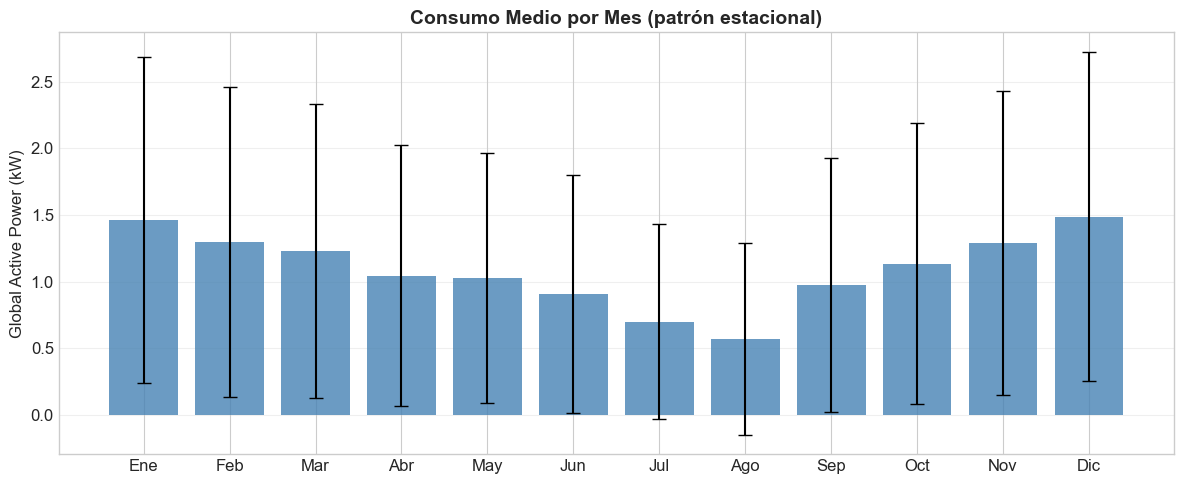

Mes con mayor consumo: Dic (1.490 kW)
Mes con menor consumo: Ago (0.573 kW)


In [39]:
# Consumo medio por mes
months_es = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
             'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

monthly_profile = df_clean.groupby('month')['Global_active_power'].agg(['mean', 'std'])

fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(range(1, 13), monthly_profile['mean'], yerr=monthly_profile['std'],
       color='steelblue', alpha=0.8, capsize=5)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(months_es)
ax.set_ylabel('Global Active Power (kW)')
ax.set_title('Consumo Medio por Mes (patrón estacional)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"Mes con mayor consumo: {months_es[monthly_profile['mean'].idxmax()-1]} ({monthly_profile['mean'].max():.3f} kW)")
print(f"Mes con menor consumo: {months_es[monthly_profile['mean'].idxmin()-1]} ({monthly_profile['mean'].min():.3f} kW)")

### 4.5 Serie Temporal Completa (vista general)

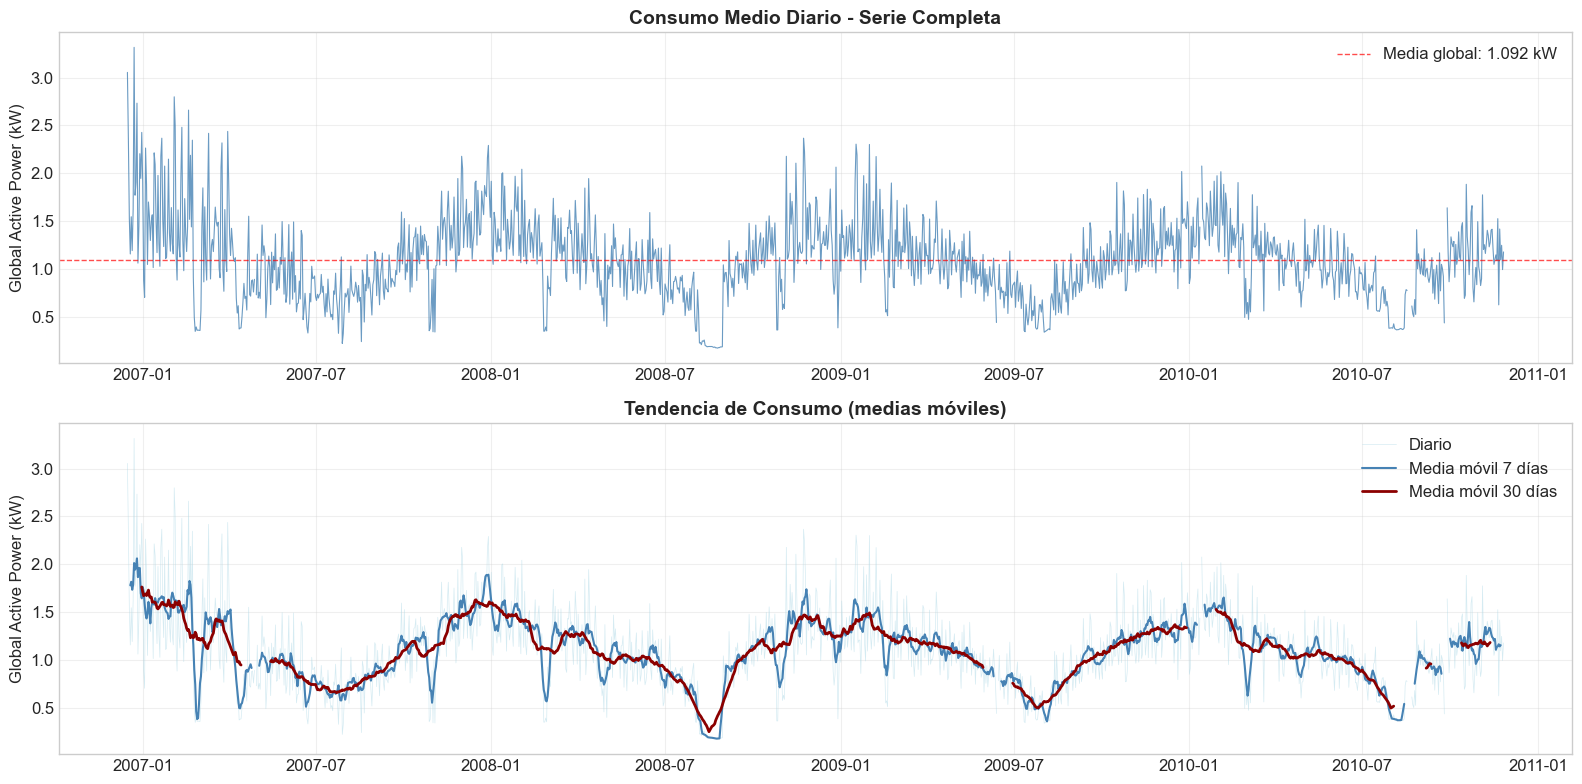

In [40]:
# Resamplear a resolución diaria para visualización
daily = df_clean['Global_active_power'].resample('D').mean()

fig, axes = plt.subplots(2, 1, figsize=(16, 8))

# Serie completa (diaria)
ax = axes[0]
ax.plot(daily.index, daily.values, linewidth=0.8, color='steelblue', alpha=0.8)
ax.axhline(daily.mean(), color='red', linestyle='--', linewidth=1, alpha=0.7,
           label=f'Media global: {daily.mean():.3f} kW')
ax.set_title('Consumo Medio Diario - Serie Completa', fontsize=14, fontweight='bold')
ax.set_ylabel('Global Active Power (kW)')
ax.legend()
ax.grid(True, alpha=0.3)

# Media móvil semanal para ver tendencia
ax = axes[1]
rolling_7d = daily.rolling(window=7, center=True).mean()
rolling_30d = daily.rolling(window=30, center=True).mean()
ax.plot(daily.index, daily.values, linewidth=0.5, color='lightblue', alpha=0.5, label='Diario')
ax.plot(rolling_7d.index, rolling_7d.values, linewidth=1.5, color='steelblue', label='Media móvil 7 días')
ax.plot(rolling_30d.index, rolling_30d.values, linewidth=2, color='darkred', label='Media móvil 30 días')
ax.set_title('Tendencia de Consumo (medias móviles)', fontsize=14, fontweight='bold')
ax.set_ylabel('Global Active Power (kW)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.6 Heatmap: Consumo por hora y día de la semana

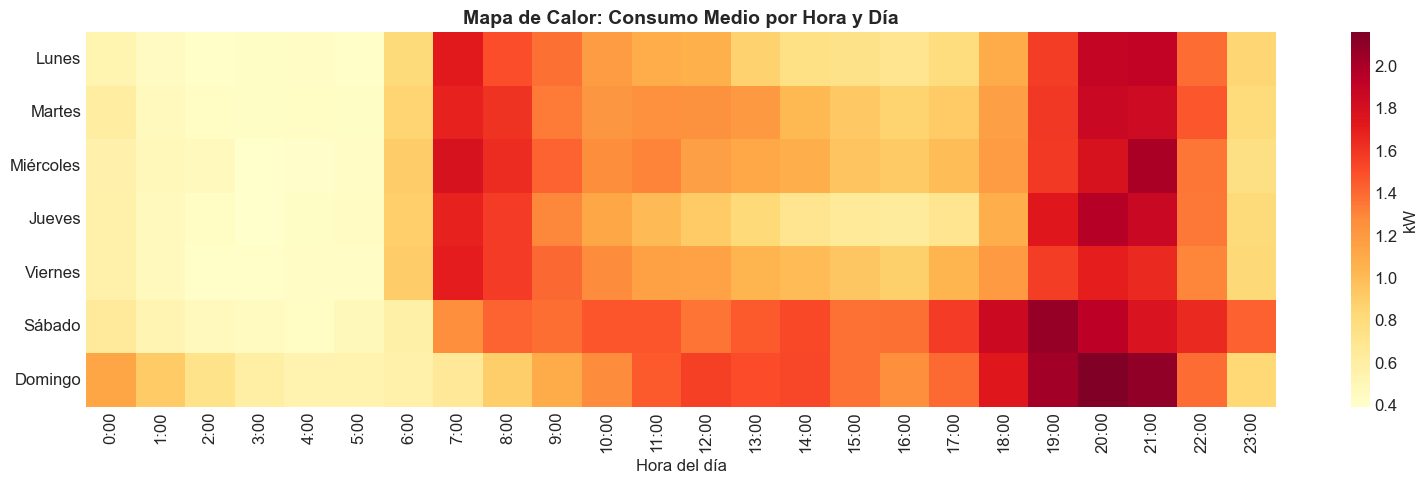

In [41]:
# Heatmap hora × día de la semana
pivot = df_clean.groupby(['dayofweek', 'hour'])['Global_active_power'].mean().unstack()

fig, ax = plt.subplots(figsize=(16, 5))
sns.heatmap(
    pivot, cmap='YlOrRd', annot=False, fmt='.2f',
    xticklabels=[f'{h}:00' for h in range(24)],
    yticklabels=days_es,
    ax=ax, cbar_kws={'label': 'kW'}
)
ax.set_title('Mapa de Calor: Consumo Medio por Hora y Día', fontsize=14, fontweight='bold')
ax.set_xlabel('Hora del día')
ax.set_ylabel('')
plt.tight_layout()
plt.show()

## 5. Análisis de Sub-Meterings

Las 3 sub-mediciones + la calculada (rest) nos dan la composición del consumo.

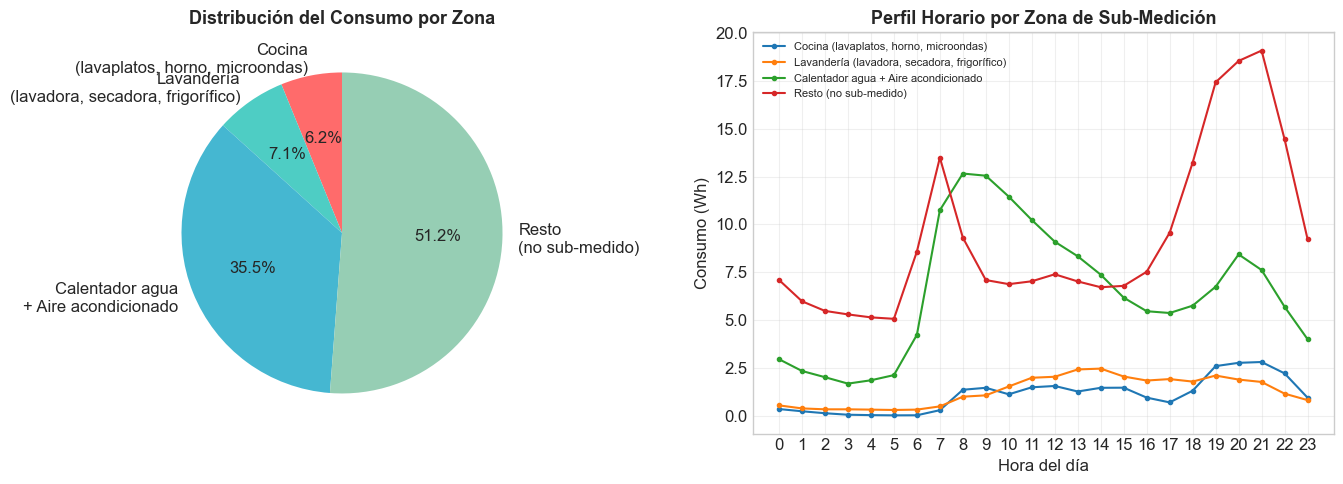

In [42]:
# Contribución de cada sub-metering al consumo total
sub_cols = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
if 'Sub_metering_rest' in df_clean.columns:
    sub_cols.append('Sub_metering_rest')

sub_means = df_clean[sub_cols].mean()
sub_labels = {
    'Sub_metering_1': 'Cocina\n(lavaplatos, horno, microondas)',
    'Sub_metering_2': 'Lavandería\n(lavadora, secadora, frigorífico)',
    'Sub_metering_3': 'Calentador agua\n+ Aire acondicionado',
    'Sub_metering_rest': 'Resto\n(no sub-medido)'
}

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
labels = [sub_labels.get(c, c) for c in sub_cols]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
axes[0].pie(sub_means.values, labels=labels, autopct='%1.1f%%',
            colors=colors[:len(sub_cols)], startangle=90)
axes[0].set_title('Distribución del Consumo por Zona', fontsize=13, fontweight='bold')

# Perfil horario por sub-metering
for col in sub_cols:
    hourly = df_clean.groupby('hour')[col].mean()
    axes[1].plot(hourly.index, hourly.values, '-o', markersize=3,
                linewidth=1.5, label=sub_labels.get(col, col).replace('\n', ' '))

axes[1].set_xlabel('Hora del día')
axes[1].set_ylabel('Consumo (Wh)')
axes[1].set_title('Perfil Horario por Zona de Sub-Medición', fontsize=13, fontweight='bold')
axes[1].set_xticks(range(24))
axes[1].legend(fontsize=8, loc='upper left')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Correlaciones entre Variables

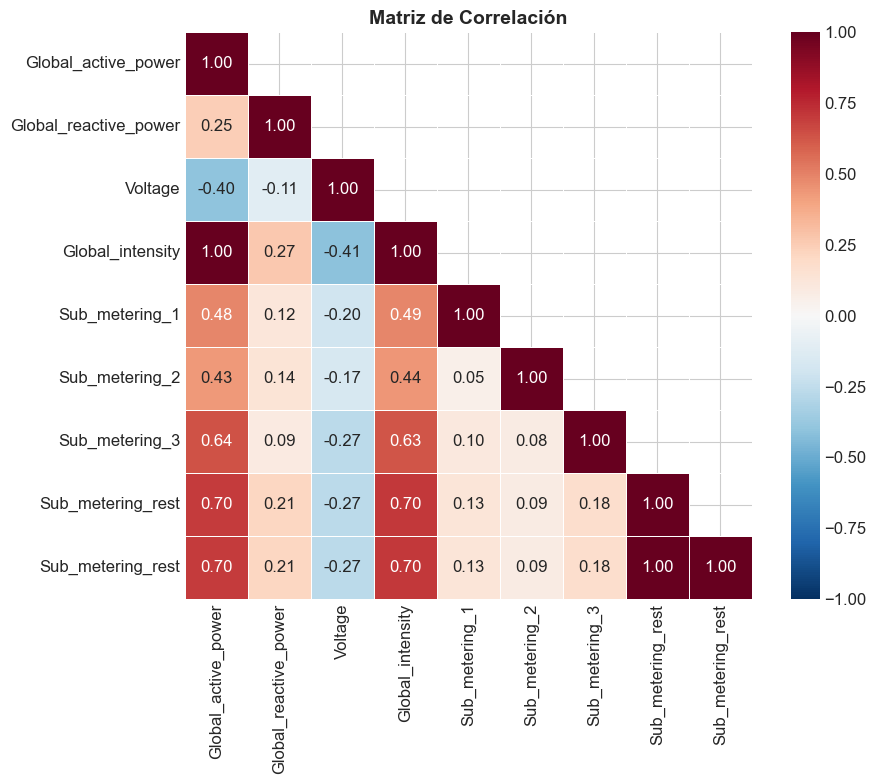


Correlaciones más fuertes (|r| > 0.5):
  Global_active_power ↔ Global_intensity: r = 0.999
  Global_active_power ↔ Sub_metering_3: r = 0.639
  Global_active_power ↔ Sub_metering_rest: r = 0.701
  Global_active_power ↔ Sub_metering_rest: r = 0.701
  Global_intensity ↔ Sub_metering_3: r = 0.627
  Global_intensity ↔ Sub_metering_rest: r = 0.703
  Global_intensity ↔ Sub_metering_rest: r = 0.703
  Sub_metering_rest ↔ Sub_metering_rest: r = 1.000


In [43]:
# Matriz de correlación
corr_cols = [c for c in numeric_cols if c in df_clean.columns]
if 'Sub_metering_rest' in df_clean.columns:
    corr_cols.append('Sub_metering_rest')

corr = df_clean[corr_cols].corr()

fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, vmin=-1, vmax=1, ax=ax,
            square=True, linewidths=0.5)
ax.set_title('Matriz de Correlación', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlaciones fuertes
print("\nCorrelaciones más fuertes (|r| > 0.5):")
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        r = corr.iloc[i, j]
        if abs(r) > 0.5:
            print(f"  {corr.columns[i]} ↔ {corr.columns[j]}: r = {r:.3f}")

## 7. Detección Preliminar de Anomalías (sin ataques inyectados)

Antes de inyectar ataques FDI, veamos si el dataset tiene anomalías naturales.
Esto nos ayuda a calibrar qué es "raro pero normal" vs qué sería un ataque.

Anomalías naturales detectadas (|z| > 3): 35,173
Porcentaje: 1.72%


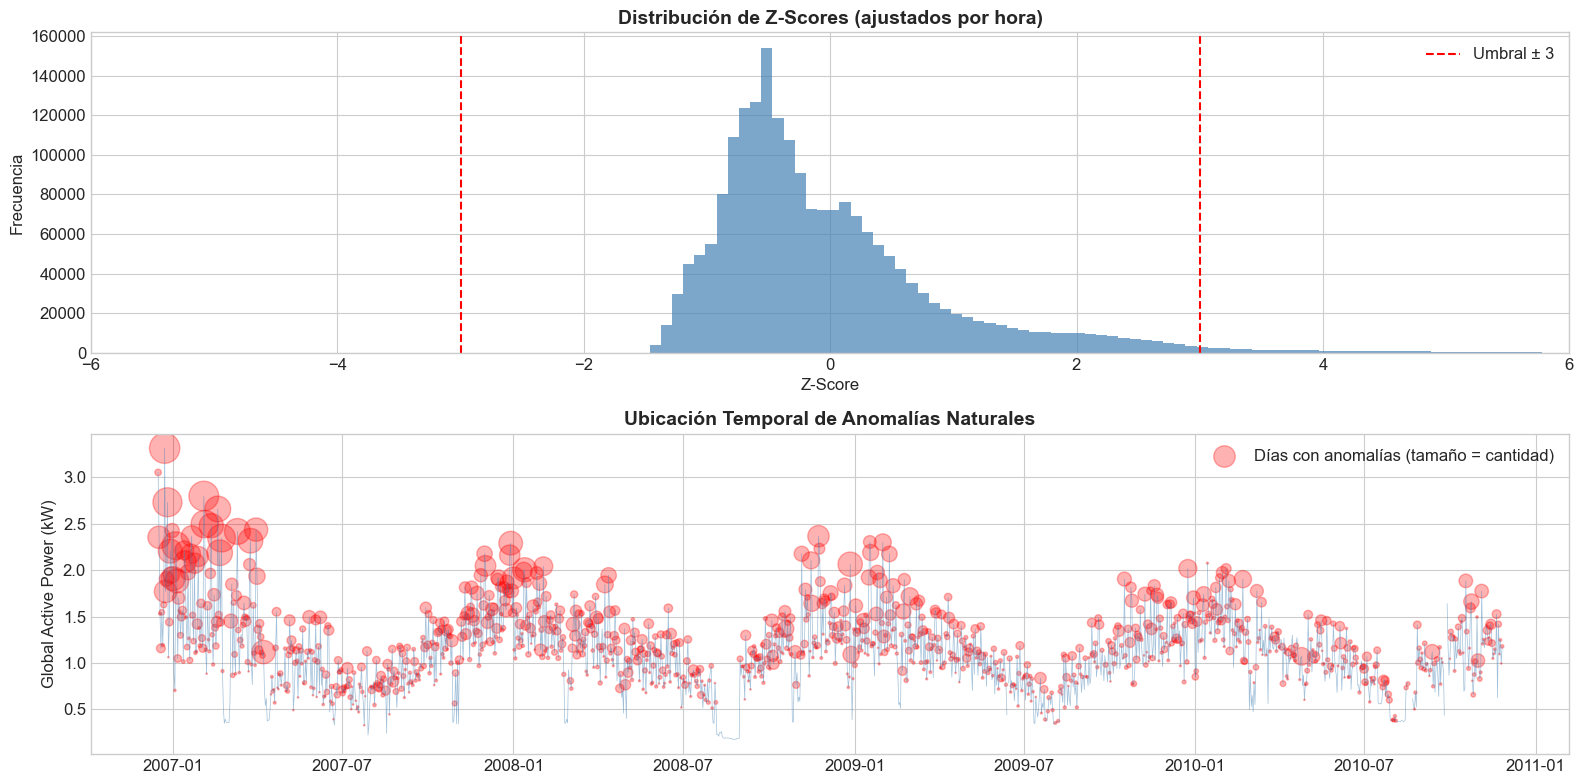

In [20]:
# Método simple: Z-score sobre Global_active_power por hora del día
# (una anomalía a las 3am no es lo mismo que a las 19h)

hourly_stats = df_clean.groupby('hour')['Global_active_power'].agg(['mean', 'std'])

df_clean['gap_zscore'] = df_clean.apply(
    lambda row: (row['Global_active_power'] - hourly_stats.loc[row['hour'], 'mean'])
                / hourly_stats.loc[row['hour'], 'std']
    if hourly_stats.loc[row['hour'], 'std'] > 0 else 0,
    axis=1
)

# Umbral: |z| > 3
threshold = 3
anomalies = df_clean[abs(df_clean['gap_zscore']) > threshold]

print(f"Anomalías naturales detectadas (|z| > {threshold}): {len(anomalies):,}")
print(f"Porcentaje: {len(anomalies)/len(df_clean)*100:.2f}%")

fig, axes = plt.subplots(2, 1, figsize=(16, 8))

# Distribución de z-scores
ax = axes[0]
ax.hist(df_clean['gap_zscore'], bins=200, color='steelblue', alpha=0.7, edgecolor='none')
ax.axvline(-threshold, color='red', linestyle='--', label=f'Umbral ± {threshold}')
ax.axvline(threshold, color='red', linestyle='--')
ax.set_title('Distribución de Z-Scores (ajustados por hora)', fontsize=14, fontweight='bold')
ax.set_xlabel('Z-Score')
ax.set_ylabel('Frecuencia')
ax.set_xlim(-6, 6)
ax.legend()

# Anomalías en el tiempo
ax = axes[1]
daily_power = df_clean['Global_active_power'].resample('D').mean()
daily_anomaly_count = anomalies['Global_active_power'].resample('D').count()
ax.plot(daily_power.index, daily_power.values, linewidth=0.5, color='steelblue', alpha=0.5)
ax.scatter(daily_anomaly_count.index, 
           daily_power.reindex(daily_anomaly_count.index).values,
           c='red', s=daily_anomaly_count.values, alpha=0.3,
           label='Días con anomalías (tamaño = cantidad)')
ax.set_title('Ubicación Temporal de Anomalías Naturales', fontsize=14, fontweight='bold')
ax.set_ylabel('Global Active Power (kW)')
ax.legend()

plt.tight_layout()
plt.show()

## 8. Análisis de Estacionariedad y Autocorrelación

Importante para decidir qué modelos usar (LSTM vs Autoencoder vs Isolation Forest).

In [22]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 20.9 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]


In [44]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Test ADF sobre datos horarios (minutales sería demasiado pesado)
hourly_gap = df_clean['Global_active_power'].resample('h').mean().dropna()

result = adfuller(hourly_gap, maxlag=168)  # max lag = 1 semana en horas
print("Test Augmented Dickey-Fuller (datos horarios):")
print(f"  Estadístico ADF: {result[0]:.4f}")
print(f"  p-valor: {result[1]:.6f}")
print(f"  Lags usados: {result[2]}")
print(f"  Valores críticos:")
for key, val in result[4].items():
    print(f"    {key}: {val:.4f}")
print(f"\n  → Serie {'ESTACIONARIA' if result[1] < 0.05 else 'NO ESTACIONARIA'} (p < 0.05)")

Test Augmented Dickey-Fuller (datos horarios):
  Estadístico ADF: -5.1225
  p-valor: 0.000013
  Lags usados: 168
  Valores críticos:
    1%: -3.4305
    5%: -2.8616
    10%: -2.5668

  → Serie ESTACIONARIA (p < 0.05)


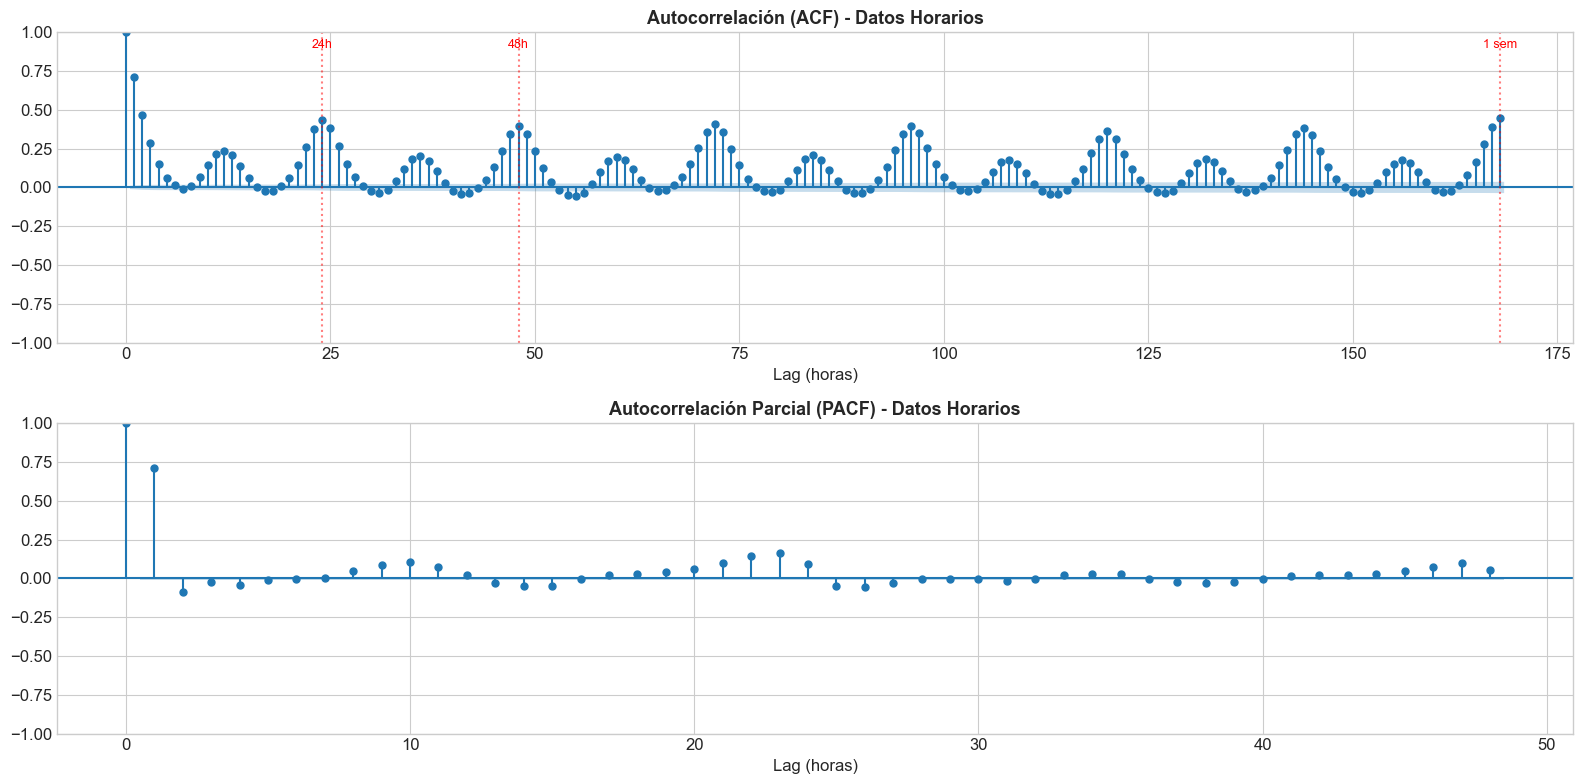


Interpretación para el TFG:
  - Picos en lag 24 y 168 confirman periodicidad diaria y semanal
  - Esto justifica el uso de ventanas de 24h o 168h para los modelos
  - LSTM y Autoencoders pueden capturar estas dependencias temporales


In [45]:
# Autocorrelación (ACF y PACF)
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

# ACF: mostrar hasta 168 lags (= 1 semana en horas)
plot_acf(hourly_gap, lags=168, ax=axes[0], alpha=0.05)
axes[0].set_title('Autocorrelación (ACF) - Datos Horarios', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Lag (horas)')
# Marcar periodicidades importantes
for lag, label in [(24, '24h'), (48, '48h'), (168, '1 sem')]:
    if lag <= 168:
        axes[0].axvline(lag, color='red', linestyle=':', alpha=0.5)
        axes[0].text(lag, axes[0].get_ylim()[1]*0.9, label, ha='center', fontsize=9, color='red')

# PACF: primeros 48 lags
plot_pacf(hourly_gap, lags=48, ax=axes[1], alpha=0.05, method='ywm')
axes[1].set_title('Autocorrelación Parcial (PACF) - Datos Horarios', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Lag (horas)')

plt.tight_layout()
plt.show()

print("\nInterpretación para el TFG:")
print("  - Picos en lag 24 y 168 confirman periodicidad diaria y semanal")
print("  - Esto justifica el uso de ventanas de 24h o 168h para los modelos")
print("  - LSTM y Autoencoders pueden capturar estas dependencias temporales")

## 9. Preparación para Modelos de Detección de Anomalías

Definimos las ventanas temporales y la normalización que usaremos.

In [46]:
# Definir features para los modelos
FEATURE_COLS = [
    'Global_active_power', 'Global_reactive_power',
    'Voltage', 'Global_intensity',
    'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
]
# Solo usar columnas que existan
FEATURE_COLS = [c for c in FEATURE_COLS if c in df_clean.columns]

print(f"Features para modelos: {FEATURE_COLS}")
print(f"Número de features: {len(FEATURE_COLS)}")

# Resumen del dataset limpio para modelos
print(f"\nDataset limpio listo para modelado:")
print(f"  Train: {df_train.shape[0]:,} filas (ajustar tras limpieza)")
print(f"  Test:  {df_test.shape[0]:,} filas (ajustar tras limpieza)")
print(f"  Features: {len(FEATURE_COLS)}")
print(f"  Resolución: 1 minuto")

Features para modelos: ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
Número de features: 7

Dataset limpio listo para modelado:
  Train: 1,452,681 filas (ajustar tras limpieza)
  Test:  622,578 filas (ajustar tras limpieza)
  Features: 7
  Resolución: 1 minuto


In [47]:
# Normalización (Min-Max para conservar la escala relativa)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Ajustar SOLO con datos de train (evitar data leakage)
train_features = df_train[FEATURE_COLS].dropna() if all(c in df_train.columns for c in FEATURE_COLS) else df_clean[FEATURE_COLS].iloc[:int(len(df_clean)*0.8)]
scaler.fit(train_features)

# Ver los rangos
print("Rangos por feature (antes de normalizar):")
for i, col in enumerate(FEATURE_COLS):
    print(f"  {col}: [{scaler.data_min_[i]:.3f}, {scaler.data_max_[i]:.3f}]")

Rangos por feature (antes de normalizar):
  Global_active_power: [0.076, 11.122]
  Global_reactive_power: [0.000, 1.390]
  Voltage: [223.200, 253.940]
  Global_intensity: [0.200, 48.400]
  Sub_metering_1: [0.000, 82.000]
  Sub_metering_2: [0.000, 78.000]
  Sub_metering_3: [0.000, 31.000]


In [48]:
# Función para crear ventanas temporales (sliding windows)
# Esto será la base para los autoencoders y LSTMs

def crear_ventanas(data, window_size=60, step=1):
    """
    Crea ventanas deslizantes de tamaño fijo.
    
    Args:
        data: array numpy de shape (n_samples, n_features)
        window_size: tamaño de la ventana en minutos
        step: paso entre ventanas (1 = todas las posibles)
    
    Returns:
        array de shape (n_windows, window_size, n_features)
    """
    windows = []
    for i in range(0, len(data) - window_size, step):
        windows.append(data[i:i + window_size])
    return np.array(windows)


# Ejemplo con ventana de 60 minutos (1 hora)
sample_data = scaler.transform(train_features.iloc[:10000])
windows = crear_ventanas(sample_data, window_size=60, step=60)

print(f"Ejemplo de creación de ventanas:")
print(f"  Datos de entrada: {sample_data.shape}")
print(f"  Ventanas generadas: {windows.shape}")
print(f"  → {windows.shape[0]} ventanas de {windows.shape[1]} minutos × {windows.shape[2]} features")

Ejemplo de creación de ventanas:
  Datos de entrada: (10000, 7)
  Ventanas generadas: (166, 60, 7)
  → 166 ventanas de 60 minutos × 7 features


## 10. Resumen y Próximos Pasos

### Hallazgos clave de este EDA:

1. **Patrón diario claro**: consumo mínimo de madrugada (~3-5h), picos al mediodía y noche
2. **Diferencia laborable/fin de semana**: el perfil cambia (más consumo diurno en fines de semana)
3. **Estacionalidad**: mayor consumo en invierno (calefacción/calentador eléctrico)
4. **Autocorrelación fuerte**: periodicidades a 24h y 168h (semanal)
5. **~1.25% de valores perdidos**: manejables con interpolación
6. **Anomalías naturales**: ~X% de puntos con |z| > 3 (ajustados por hora)

### Próximos notebooks:

- **Notebook 02**: Inyección de ataques FDI sintéticos (scaling, offset, random noise)
- **Notebook 03**: Modelo 1 - Isolation Forest (baseline)
- **Notebook 04**: Modelo 2 - Autoencoder denso
- **Notebook 05**: Modelo 3 - LSTM-Autoencoder
- **Notebook 06**: Comparativa de modelos y análisis Edge

In [ ]:
# Guardar dataset limpio para los siguientes notebooks
OUTPUT_DIR = '/Volumes/Extreme Pro Particion 1TB/TFG/UCIrvine/'

import os
os.makedirs(OUTPUT_DIR, exist_ok=True)

df_clean.to_csv(f'{OUTPUT_DIR}uci_clean_full.csv')
print(f"Dataset limpio guardado en {OUTPUT_DIR}uci_clean_full.csv")
print(f"  Filas: {df_clean.shape[0]:,}")
print(f"  Columnas: {list(df_clean.columns)}")

Dataset limpio guardado en /Volumes/Extreme Pro Particion 1TB/TFG/UCIrvineuci_clean_full.csv
  Filas: 2,049,512
  Columnas: ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Sub_metering_rest', 'hour', 'dayofweek', 'month', 'year', 'is_weekend']
